# Audio Preparation: Side A
Here it comes the fun part... Let's do an audio exploration of the files!

We need to separate Side A from the audio clips for our purpouses, and also clean it from the pure noise parts.


## Intro

Let's see how the plots of the audios are.

In [1]:
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import IPython

In [2]:
wills = pd.read_csv("./output/wills_audio_annotated.csv")
wills.head()

Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2             2           2   
3             3           3   
4             4           4   

                                                Link  \
0  http://www.watchcount.com/go/?item=11623035299...   
1  http://www.watchcount.com/go/?item=11623035299...   
2  http://www.watchcount.com/go/?item=11623035039...   
3  http://www.watchcount.com/go/?item=11623034962...   
4  http://www.watchcount.com/go/?item=11623034725...   

                                               Title  \
0  Ahmed al-Jaberi - Rare SUDAN Arabic Afro 45 / ...   
1  Ahmed al-Jaberi - Rare SUDAN Arabic Afro 45 / ...   
2  Mohamed Mirghani - Rare SUDAN Arabic Afro 45 /...   
3  Tayeb Abdullah ? - Rare SUDAN Arabic Afro 45 /...   
4  Ibrahim Awad - Ya Zaman - Rare SUDAN Arabic Af...   

                                           condition  \
0                                                NaN   
1  :&nbsp;\u003C/b><span style=\"font-family: Ari...   
2  :&nbsp;\u003C/b><span style=\"font-family: Ari...   
3  :&nbsp;\u003C/b><span style=\"font-family: Ari...   
4  :&nbsp;\u003C/b><span style=\"font-family: Ari...   

                   mp3_path A_first_part  
0                       NaN          NaN  
1  ./output/audio2/7595.mp3          VG+  
2  ./output/audio2/5576.mp3          VG+  
3  ./output/audio2/7000.mp3           VG  
4  ./output/audio2/4374.mp3          VG+

Ups. Let's remove this two dummy columns

In [3]:
wills.drop(columns=["Unnamed: 0.1", "Unnamed: 0"], inplace = True)

Let's take an example, with some background noise, for example, G+

In [4]:
wills.iloc[9,:][["mp3_path", "A_first_part"]]

mp3_path        ./output/audio2/DM%2039.mp3
A_first_part                             G+
Name: 9, dtype: object

In [5]:
audio_test_gplus = wills.iloc[9,:]["mp3_path"]

Let's create the librosa array and sampling rate element.

In [6]:
array, sampling_rate = librosa.load(audio_test_gplus)

In [8]:
sampling_rate

22050

In [9]:
IPython.display.Audio(audio_test_gplus)

## Figures
Let's plot the classic figures to see how the audio looks.

### Waveform

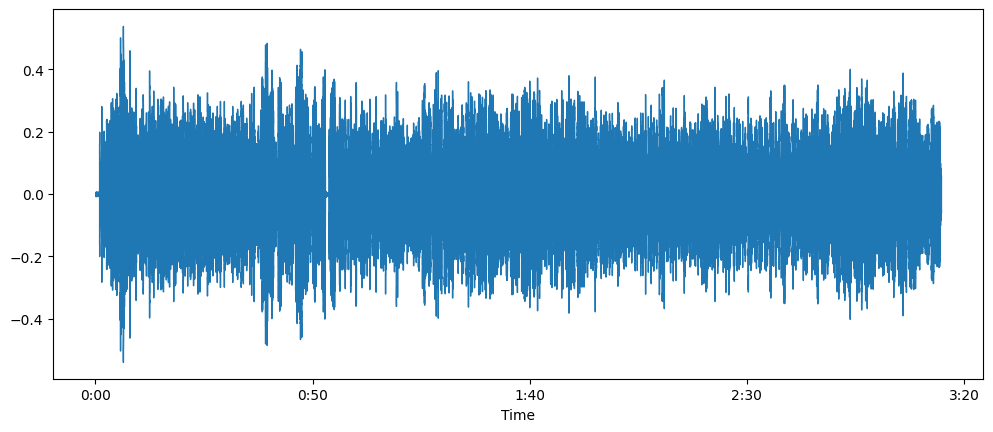

In [10]:
plt.figure().set_figwidth(12)
librosa.display.waveshow(array, sr=sampling_rate)
plt.show()

To separate the sides, let's create a threeshold and split the audio in parts.

In [11]:
nonmute = librosa.effects.split(array, top_db=40)

Let's try to split the two sides

In [12]:
def displayTime(startFrame, endFrame):    
    print(' start time: ' + str(startFrame/sampling_rate) + ', end time: ' + str(endFrame/sampling_rate))

In [13]:
for i in nonmute:    
    displayTime(i[0],i[1])

 start time: 0.8126984126984127, end time: 53.057596371882084
 start time: 53.59165532879818, end time: 194.71097505668934


We have the two sides now! Perfect.

### Frequency Spectrum

In [14]:
dft_input = array[22050*4: 22050*5]

# calculate the DFT
window = np.hanning(len(dft_input))
windowed_input = dft_input * window
dft = np.fft.rfft(windowed_input)

# get the amplitude spectrum in decibels
amplitude = np.abs(dft)
amplitude_db = librosa.amplitude_to_db(amplitude, ref=np.max)

# get the frequency bins
frequency = librosa.fft_frequencies(sr=sampling_rate, n_fft=len(dft_input))

plt.figure().set_figwidth(12)
plt.plot(frequency, amplitude_db)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (dB)")
plt.xscale("log")
plt.title("Frequency Spectrum from 00:04 to 00:05")
plt.show()

Let's print the noise part. 

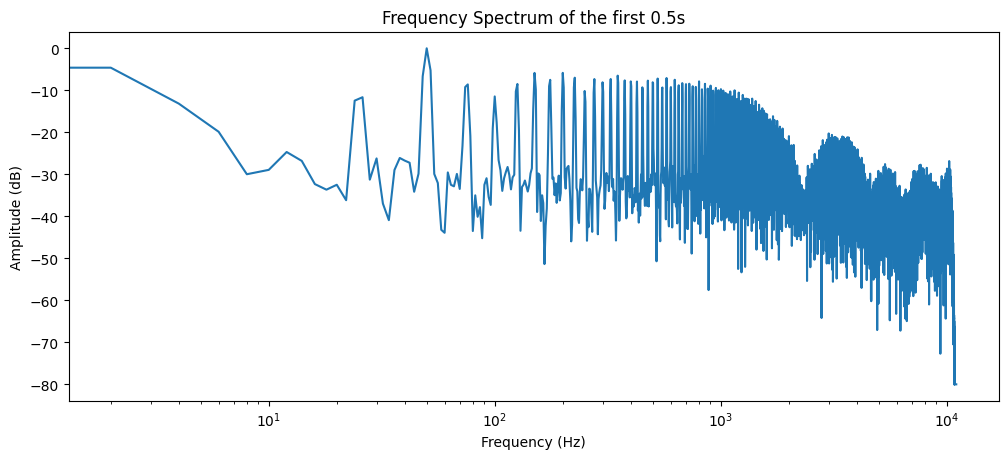

In [15]:
dft_input = array[:11025]

# calculate the DFT
window = np.hanning(len(dft_input))
windowed_input = dft_input * window
dft = np.fft.rfft(windowed_input)

# get the amplitude spectrum in decibels
amplitude = np.abs(dft)
amplitude_db = librosa.amplitude_to_db(amplitude, ref=np.max)

# get the frequency bins
frequency = librosa.fft_frequencies(sr=sampling_rate, n_fft=len(dft_input))

plt.figure().set_figwidth(12)
plt.plot(frequency, amplitude_db)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (dB)")
plt.xscale("log")
plt.title("Frequency Spectrum of the first 0.5s")
plt.show()

### Spectogram

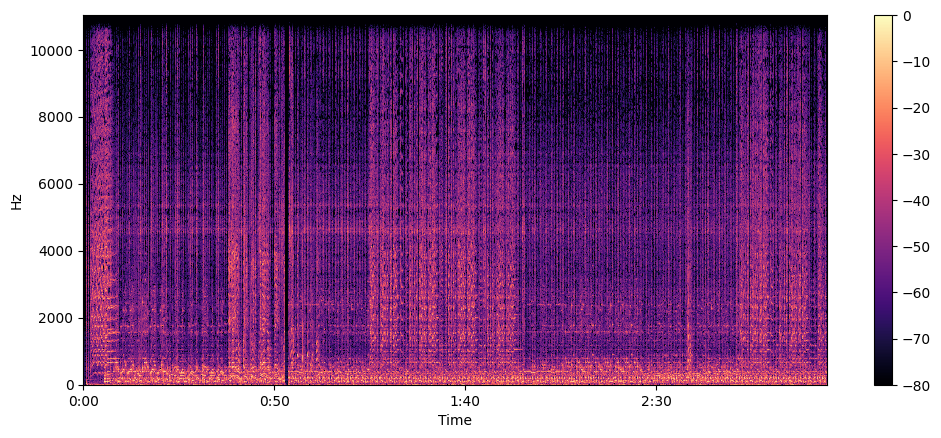

In [16]:

D = librosa.stft(array)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_db, x_axis="time", y_axis="hz")
plt.colorbar()

### Mel Spectogram

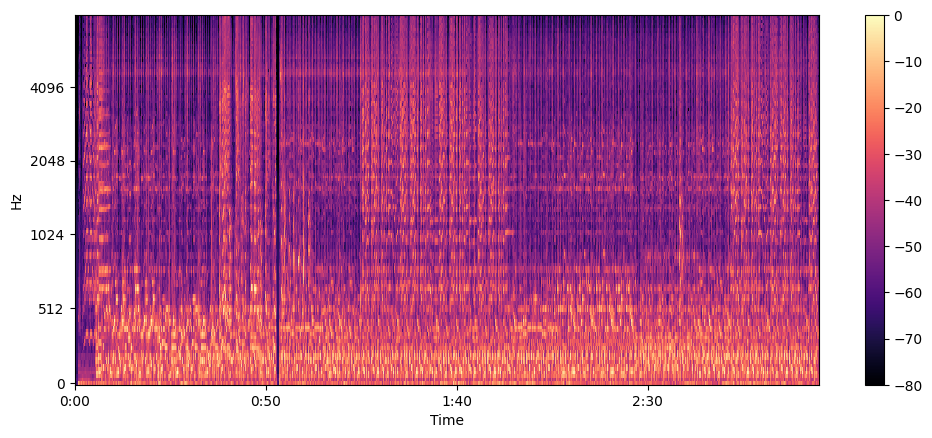

In [17]:
S = librosa.feature.melspectrogram(y=array, sr=sampling_rate, n_mels=128, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_dB, x_axis="time", y_axis="mel", sr=sampling_rate, fmax=8000)
plt.colorbar()

## Splitting all the faces

### Test on sample
We're going to construct the functions and the steps for a small sample of 10 audios and then apply to the whole dataset.

In [18]:
sample_audios=wills[["mp3_path", "A_first_part"]].dropna().sample(10, random_state = 23)
sample_audios

mp3_path A_first_part
74    ./output/audio2/LAM%20042.mp3          VG+
286   ./output/audio2/DAK%20002.mp3          VG+
266  ./output/audio2/ASL%203083.mp3           VG
358   ./output/audio2/POL%20393.mp3           VG
15   ./output/audio2/DNJ%200010.mp3           G+
346   ./output/audio2/ZIM%20452.mp3           VG
141        ./output/audio2/0544.mp3          VG+
323    ./output/audio2/A%202475.mp3          VG+
331        ./output/audio2/2756.mp3           VG
70    ./output/audio2/ZMA%20239.mp3          VG+

74


/var/folders/yh/x279jgtx5kl6hvdfz8dcbkvr0000gn/T/ipykernel_7619/4143134610.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  array, sampling_rate = librosa.load(audio[0])


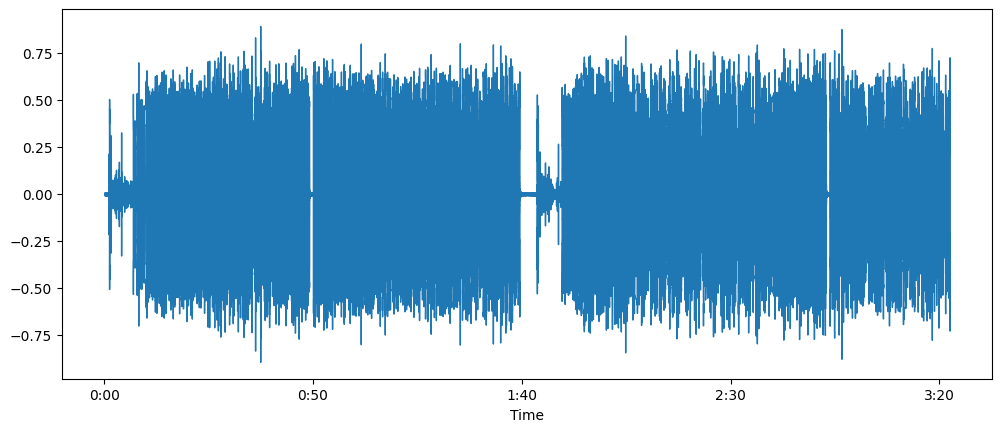

 start time: 0.9287981859410431, end time: 49.31918367346939
 start time: 49.92290249433107, end time: 99.70648526077098
 start time: 103.42167800453515, end time: 173.05832199546487
 start time: 173.6156009070295, end time: 202.4780045351474
286


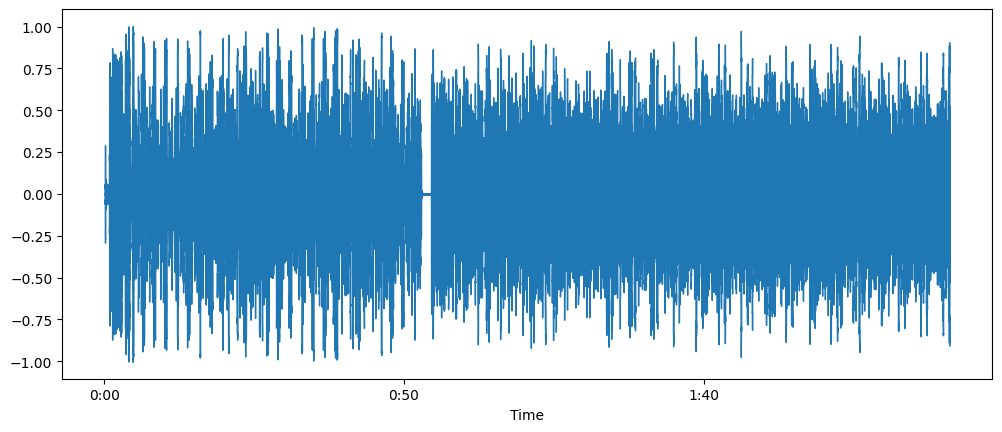

 start time: 0.0, end time: 52.98793650793651
 start time: 54.474013605442174, end time: 141.12
266


 start time: 0.0, end time: 44.76807256235828
 start time: 44.7912925170068, end time: 44.90739229024943
 start time: 45.00027210884354, end time: 117.72517006802721
 start time: 122.11374149659864, end time: 163.56136054421768
 start time: 163.7471201814059, end time: 227.4742857142857
358


 start time: 0.0, end time: 30.928979591836736
 start time: 30.975419501133786, end time: 31.068299319727892
 start time: 31.509478458049887, end time: 125.72444444444444
15


 start time: 0.0, end time: 174.5908390022676
 start time: 175.07845804988662, end time: 271.15106575963716
346


 start time: 0.0, end time: 161.58766439909297
 start time: 165.0938775510204, end time: 226.39455782312925
 start time: 226.4409977324263, end time: 273.35691609977323
141


 start time: 0.0, end time: 53.59165532879818
 start time: 54.61333333333334, end time: 113.91709750566893
323


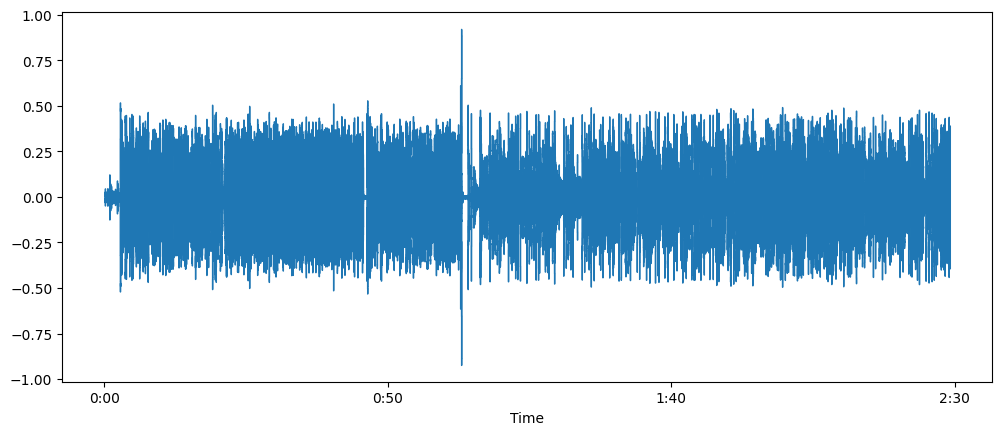

 start time: 0.0, end time: 0.09287981859410431
 start time: 0.18575963718820862, end time: 1.9504761904761905
 start time: 2.020136054421769, end time: 2.4380952380952383
 start time: 2.647074829931973, end time: 45.743310657596375
 start time: 46.20770975056689, end time: 63.227936507936505
 start time: 63.27437641723356, end time: 63.39047619047619
 start time: 64.06385487528345, end time: 64.52825396825396
 start time: 64.6443537414966, end time: 64.92299319727891
 start time: 64.99265306122449, end time: 149.18820861678006
331


 start time: 0.0, end time: 73.3750566893424
 start time: 73.46793650793651, end time: 73.58403628117914
 start time: 75.27909297052155, end time: 75.81315192743764
 start time: 75.88281179138322, end time: 76.95092970521542
 start time: 76.97414965986394, end time: 136.78875283446712
70


 start time: 0.0, end time: 53.45233560090703
 start time: 54.17215419501134, end time: 131.79646258503402
 start time: 133.67727891156463, end time: 170.36480725623582
 start time: 171.24716553287982, end time: 232.87292517006802


In [19]:
for index, audio in sample_audios.iterrows():
    print(index)
    array, sampling_rate = librosa.load(audio[0])
    plt.figure().set_figwidth(12)
    librosa.display.waveshow(array, sr=sampling_rate)
    plt.show()
    nonmute = librosa.effects.split(array, top_db=40)
    for i in nonmute:    
        displayTime(i[0],i[1])

As we see we can have multiple segments, but we need the first one only.

Let's create a function that saves the first segment (side A) in a specific folder.

In [20]:
import os
import soundfile as sf
def save_segment_as_audio(audio, segments, index_towrite, output_folder, file_name, sampling_rate):
    # Create output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)
    # Save the segment as a WAV file
    output_path = os.path.join(output_folder, file_name)
    sf.write(output_path, audio[segments[index_towrite][0]:segments[index_towrite][1]], samplerate=sampling_rate)

Lets build a function that checks the lenght of the segment.

In [21]:
def check_lenght(sampling_rate, segment):
    print((segment[1]-segment[0])/sampling_rate)
    return (segment[1]-segment[0])/sampling_rate


Let's iterate over this sample audios.

In [22]:
sample_audios["SIDEA_path"] =""

In [23]:
for index, audio in sample_audios.iterrows():
    index_audio = 0
    file_name = os.path.basename(audio[0])
    array, sampling_rate = librosa.load(audio[0])
    nonmute = librosa.effects.split(array, top_db=40)
    nonmute = nonmute.astype(np.int32)
    sample_audios.loc[index, "SIDEA_path"] = os.path.join("./output/audio2/SIDEA", file_name)
    print(nonmute)
    while check_lenght(sampling_rate, nonmute[index_audio]) < 5:
        index_audio+=1
    save_segment_as_audio(array, nonmute, index_audio, "./output/audio2/SIDEA", file_name, sampling_rate)

/var/folders/yh/x279jgtx5kl6hvdfz8dcbkvr0000gn/T/ipykernel_7619/220623626.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  file_name = os.path.basename(audio[0])
/var/folders/yh/x279jgtx5kl6hvdfz8dcbkvr0000gn/T/ipykernel_7619/220623626.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  array, sampling_rate = librosa.load(audio[0])


[[  20480 1087488]
 [1100800 2198528]
 [2280448 3815936]
 [3828224 4464640]]
48.39038548752834


/var/folders/yh/x279jgtx5kl6hvdfz8dcbkvr0000gn/T/ipykernel_7619/220623626.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  file_name = os.path.basename(audio[0])
/var/folders/yh/x279jgtx5kl6hvdfz8dcbkvr0000gn/T/ipykernel_7619/220623626.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  array, sampling_rate = librosa.load(audio[0])


[[      0 1168384]
 [1201152 3111696]]
52.98793650793651


/var/folders/yh/x279jgtx5kl6hvdfz8dcbkvr0000gn/T/ipykernel_7619/220623626.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  file_name = os.path.basename(audio[0])
/var/folders/yh/x279jgtx5kl6hvdfz8dcbkvr0000gn/T/ipykernel_7619/220623626.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  array, sampling_rate = librosa.load(audio[0])


[[      0  987136]
 [ 987648  990208]
 [ 992256 2595840]
 [2692608 3606528]
 [3610624 5015808]]
44.76807256235828


/var/folders/yh/x279jgtx5kl6hvdfz8dcbkvr0000gn/T/ipykernel_7619/220623626.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  file_name = os.path.basename(audio[0])
/var/folders/yh/x279jgtx5kl6hvdfz8dcbkvr0000gn/T/ipykernel_7619/220623626.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  array, sampling_rate = librosa.load(audio[0])


[[      0  681984]
 [ 683008  685056]
 [ 694784 2772224]]
30.928979591836736


/var/folders/yh/x279jgtx5kl6hvdfz8dcbkvr0000gn/T/ipykernel_7619/220623626.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  file_name = os.path.basename(audio[0])
/var/folders/yh/x279jgtx5kl6hvdfz8dcbkvr0000gn/T/ipykernel_7619/220623626.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  array, sampling_rate = librosa.load(audio[0])


[[      0 3849728]
 [3860480 5978881]]
174.5908390022676


/var/folders/yh/x279jgtx5kl6hvdfz8dcbkvr0000gn/T/ipykernel_7619/220623626.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  file_name = os.path.basename(audio[0])
/var/folders/yh/x279jgtx5kl6hvdfz8dcbkvr0000gn/T/ipykernel_7619/220623626.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  array, sampling_rate = librosa.load(audio[0])


[[      0 3563008]
 [3640320 4992000]
 [4993024 6027520]]
161.58766439909297


/var/folders/yh/x279jgtx5kl6hvdfz8dcbkvr0000gn/T/ipykernel_7619/220623626.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  file_name = os.path.basename(audio[0])
/var/folders/yh/x279jgtx5kl6hvdfz8dcbkvr0000gn/T/ipykernel_7619/220623626.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  array, sampling_rate = librosa.load(audio[0])


[[      0 1181696]
 [1204224 2511872]]
53.59165532879818


/var/folders/yh/x279jgtx5kl6hvdfz8dcbkvr0000gn/T/ipykernel_7619/220623626.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  file_name = os.path.basename(audio[0])
/var/folders/yh/x279jgtx5kl6hvdfz8dcbkvr0000gn/T/ipykernel_7619/220623626.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  array, sampling_rate = librosa.load(audio[0])


[[      0    2048]
 [   4096   43008]
 [  44544   53760]
 [  58368 1008640]
 [1018880 1394176]
 [1395200 1397760]
 [1412608 1422848]
 [1425408 1431552]
 [1433088 3289600]]
0.09287981859410431
1.7647165532879818
0.4179591836734694
43.0962358276644


/var/folders/yh/x279jgtx5kl6hvdfz8dcbkvr0000gn/T/ipykernel_7619/220623626.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  file_name = os.path.basename(audio[0])
/var/folders/yh/x279jgtx5kl6hvdfz8dcbkvr0000gn/T/ipykernel_7619/220623626.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  array, sampling_rate = librosa.load(audio[0])


[[      0 1617920]
 [1619968 1622528]
 [1659904 1671680]
 [1673216 1696768]
 [1697280 3016192]]
73.3750566893424


/var/folders/yh/x279jgtx5kl6hvdfz8dcbkvr0000gn/T/ipykernel_7619/220623626.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  file_name = os.path.basename(audio[0])
/var/folders/yh/x279jgtx5kl6hvdfz8dcbkvr0000gn/T/ipykernel_7619/220623626.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  array, sampling_rate = librosa.load(audio[0])


[[      0 1178624]
 [1194496 2906112]
 [2947584 3756544]
 [3776000 5134848]]
53.45233560090703


Check if the audios have been cutted in the right way.

In [24]:
sample_audios.reset_index().loc[1, "SIDEA_path"]

'./output/audio2/SIDEA/DAK%20002.mp3'

In [25]:
IPython.display.Audio(sample_audios.reset_index().loc[1, "SIDEA_path"])

It's ok on this sample! Let's plot all the new segments to see if it's done well.

74


/var/folders/yh/x279jgtx5kl6hvdfz8dcbkvr0000gn/T/ipykernel_7619/1866996393.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  array, sampling_rate = librosa.load(audio[2])
/var/folders/yh/x279jgtx5kl6hvdfz8dcbkvr0000gn/T/ipykernel_7619/1866996393.py:3: UserWarning: PySoundFile failed. Trying audioread instead.
  array, sampling_rate = librosa.load(audio[2])
/opt/anaconda3/envs/vinyl_grade/lib/python3.12/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


 start time: 0.0, end time: 48.39038548752834
286


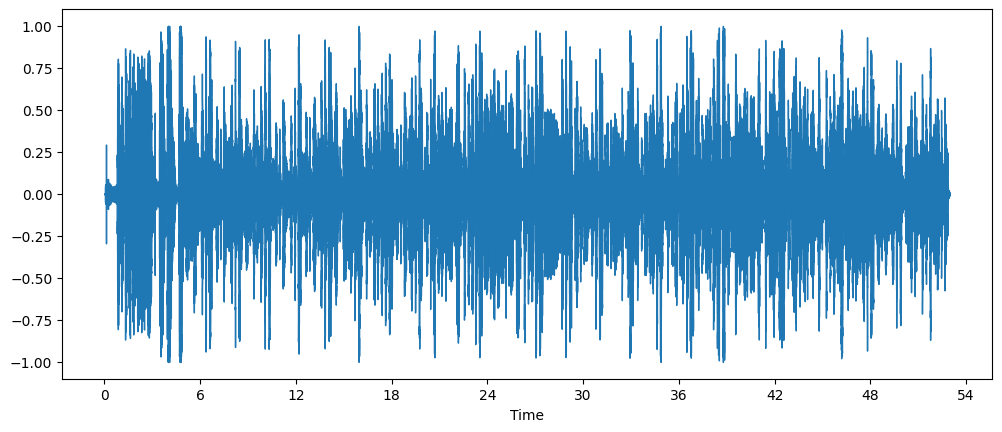

 start time: 0.0, end time: 52.98793650793651
266


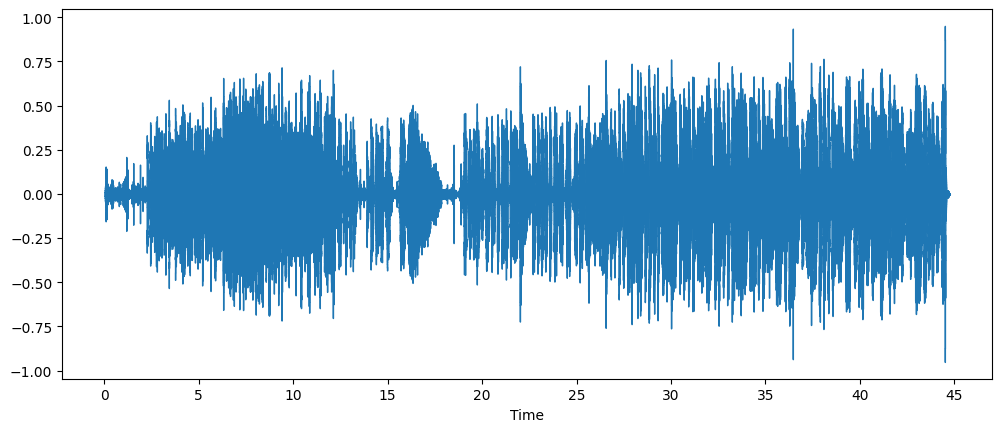

 start time: 0.0, end time: 44.76807256235828
358


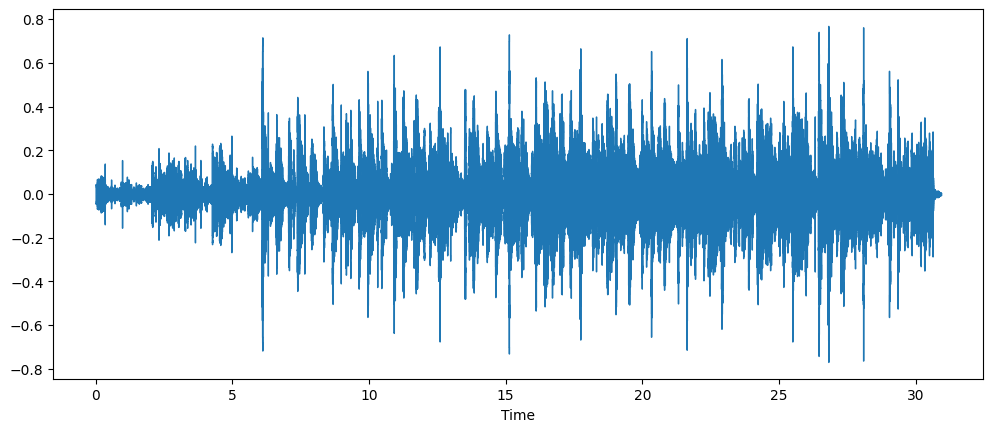

 start time: 0.0, end time: 30.905759637188208
15


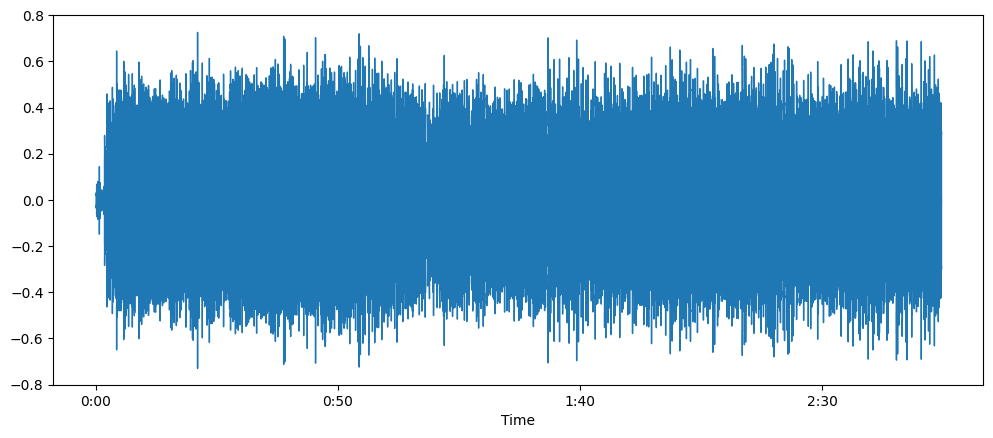

 start time: 0.0, end time: 174.5908390022676
346


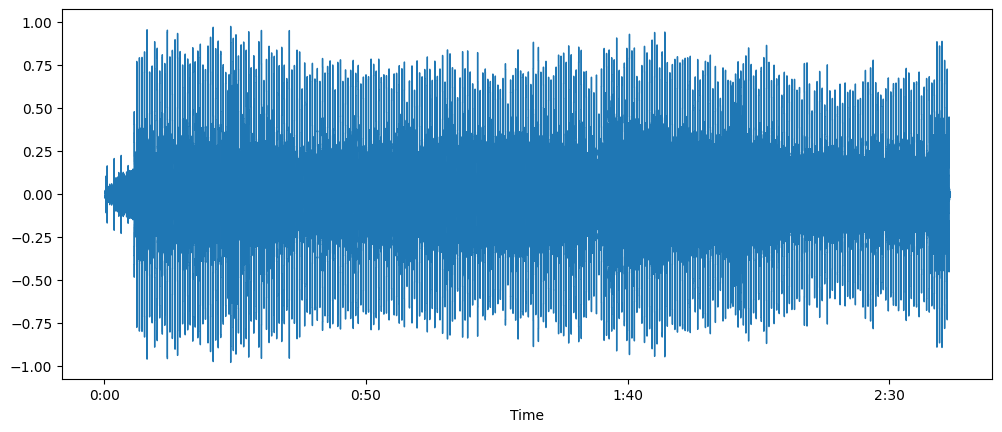

 start time: 0.0, end time: 161.58766439909297
141


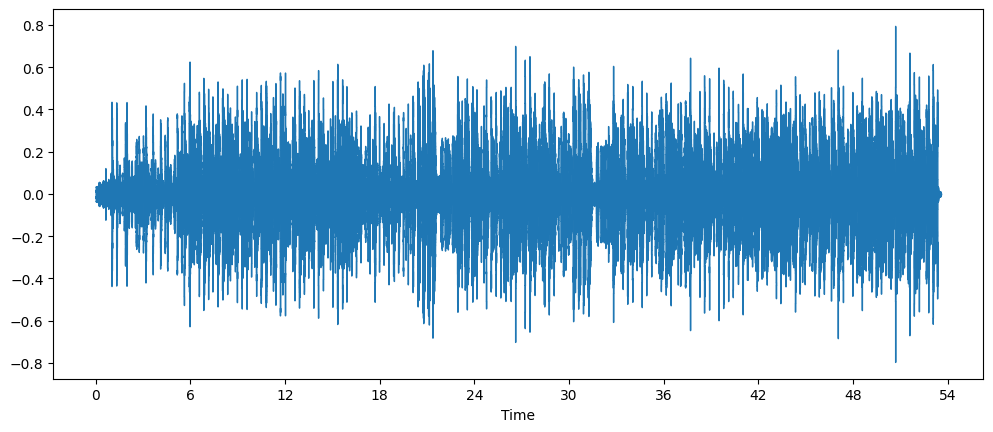

 start time: 0.0, end time: 53.59165532879818
323


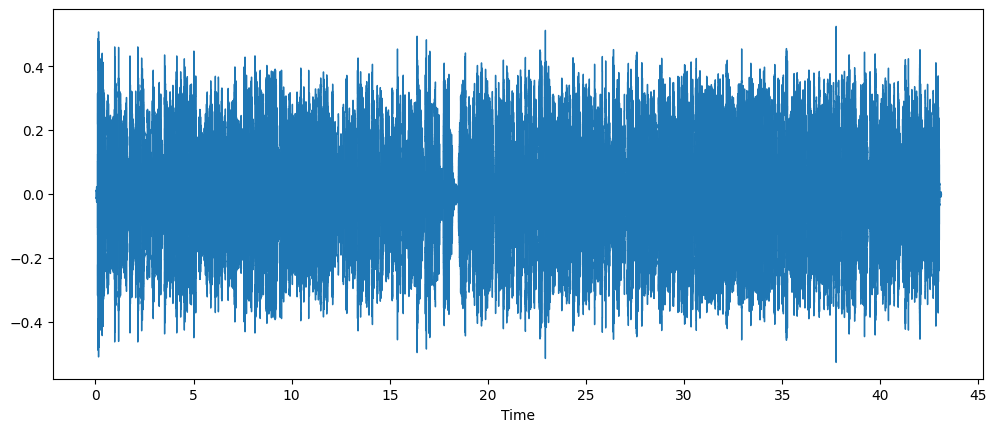

 start time: 0.0, end time: 43.0962358276644
331


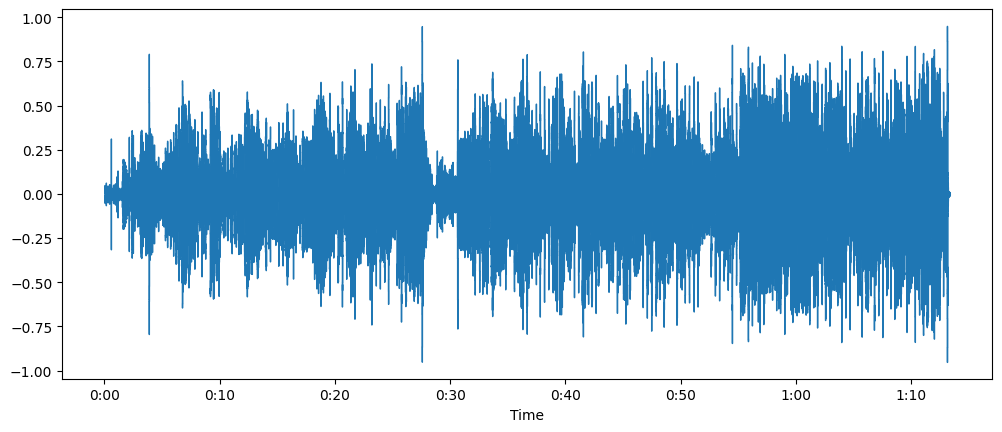

 start time: 0.0, end time: 73.3750566893424
70


 start time: 0.0, end time: 53.45233560090703


In [26]:
for index, audio in sample_audios.iterrows():
    print(index)
    array, sampling_rate = librosa.load(audio[2])
    plt.figure().set_figwidth(12)
    librosa.display.waveshow(array, sr=sampling_rate)
    plt.show()
    nonmute = librosa.effects.split(array, top_db=40)
    for i in nonmute:    
        displayTime(i[0],i[1])

Is working! :)

Now is time to cut all the audio files.

### Final step

In [27]:
wills["SIDEA_path"] = ""
wills["SIDEA_length"] = "" # We will store also the length

In [28]:
wills

Link  \
0    http://www.watchcount.com/go/?item=11623035299...   
1    http://www.watchcount.com/go/?item=11623035299...   
2    http://www.watchcount.com/go/?item=11623035039...   
3    http://www.watchcount.com/go/?item=11623034962...   
4    http://www.watchcount.com/go/?item=11623034725...   
..                                                 ...   
373  http://www.watchcount.com/go/?item=11614711141...   
374  http://www.watchcount.com/go/?item=11614582680...   
375  http://www.watchcount.com/go/?item=11614710989...   
376  http://www.watchcount.com/go/?item=11614582458...   
377  http://www.watchcount.com/go/?item=11614580972...   

                                                 Title  \
0    Ahmed al-Jaberi - Rare SUDAN Arabic Afro 45 / ...   
1    Ahmed al-Jaberi - Rare SUDAN Arabic Afro 45 / ...   
2    Mohamed Mirghani - Rare SUDAN Arabic Afro 45 /...   
3    Tayeb Abdullah ? - Rare SUDAN Arabic Afro 45 /...   
4    Ibrahim Awad - Ya Zaman - Rare SUDAN Arabic Af...   
..                                                 ...   
373  Daudi Kabaka with J. Isiaho – Mahaba Twist  - ...   
374  The Shoe Laces – Zandile - SOUTH AFRICA Zulu D...   
375  Dick Ngoye And Party – Robinson Olago - KENYA ...   
376  New Hard Spirits - Mainah - ZIMBABWE Super Rum...   
377  Oujubaha (The Wonders) - Persien Middle East P...   

                                             condition  \
0                                                  NaN   
1    :&nbsp;\u003C/b><span style=\"font-family: Ari...   
2    :&nbsp;\u003C/b><span style=\"font-family: Ari...   
3    :&nbsp;\u003C/b><span style=\"font-family: Ari...   
4    :&nbsp;\u003C/b><span style=\"font-family: Ari...   
..                                                 ...   
373  :&nbsp;\u003C/b><span style=\"font-family: Ari...   
374  :&nbsp;\u003C/b><span style=\"font-family: Ari...   
375  :&nbsp;\u003C/b><span style=\"font-family: Ari...   
376  :&nbsp;\u003C/b><span style=\"font-family: Ari...   
377  :&nbsp;\u003C/b><span style=\"font-family: Ari...   

                          mp3_path A_first_part SIDEA_path SIDEA_length  
0                              NaN          NaN                          
1         ./output/audio2/7595.mp3          VG+                          
2         ./output/audio2/5576.mp3          VG+                          
3         ./output/audio2/7000.mp3           VG                          
4         ./output/audio2/4374.mp3          VG+                          
..                             ...          ...        ...          ...  
373  ./output/audio2/FUR%20130.mp3           VG                          
374    ./output/audio2/BH%2054.mp3          VG+                          
375     ./output/audio2/GT%204.mp3           G+                          
376   ./output/audio2/AP%20459.mp3          VG+                          
377     ./output/audio2/M%2045.mp3           G+                          

[378 rows x 7 columns]

In [29]:
# Redifine without prints
def check_lenght(sampling_rate, segment):
    return (segment[1]-segment[0])/sampling_rate

In [30]:
wills.mp3_path.isna().value_counts()

mp3_path
False    376
True       2
Name: count, dtype: int64

Let's drop the NaN values

In [31]:
wills.dropna(subset = "mp3_path", inplace = True)
wills.reset_index(inplace=True, drop = True)


And... Split all the audios!

In [ ]:
for index, audio in wills.iterrows():
    print(index)
    try:
        index_audio = 0
        file_name = os.path.basename(audio[3])
        array, sampling_rate = librosa.load(audio[3])
        nonmute = librosa.effects.split(array, top_db=40)
        nonmute = nonmute.astype(np.int32)
        wills.loc[index, "SIDEA_path"] = os.path.join("./output/audio2/SIDEA", file_name)
        wills.loc[index, "SIDEA_length"] = check_lenght(sampling_rate, nonmute[index_audio])
        while check_lenght(sampling_rate, nonmute[index_audio]) < 5:
            index_audio+=1
        save_segment_as_audio(array, nonmute, index_audio, "./output/audio2/SIDEA", file_name, sampling_rate)
    except:
        print("ERROR: {}".format(index))

We can save now our csv file.

In [33]:
wills.to_csv("./output/wills_audio_SIDEA.csv")